In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('../data/sap_procurement_data.csv')

# Preview
print("Shape of data:", df.shape)
df.head()


Shape of data: (300, 13)


,Vendor_ID,Vendor_Name,Material_Group,PO_ID,PO_Date,Delivery_Date,Quantity,Unit_Price,PO_Amount,Country,Supplier_Rating,Payment_Terms,Delivery_Status
0,V0016,Galloway-Wyatt,Electronics,PO93692,2024-06-15,2024-07-01,87,323.69,28161.03,USA,4,Partial,On Time
1,V0018,"Flowers, Martin and Kelly",Textiles,PO17064,2024-04-11,2024-05-17,42,425.13,17855.46,Brazil,4,Net 30,Delayed
2,V0005,"Guzman, Hoffman and Baldwin",Electronics,PO77630,2024-01-17,2024-02-29,71,133.41,9472.11,Brazil,4,Net 60,Delayed
3,V0015,Williams and Sons,Mechanical,PO42765,2025-06-09,2025-07-16,79,460.75,36399.25,USA,3,Net 30,Delayed
4,V0004,Davis and Sons,Textiles,PO99097,2024-10-31,2024-11-28,91,297.13,27038.83,India,1,Net 30,On Time


In [2]:
df['PO_Date'] = pd.to_datetime(df['PO_Date'])
df['Delivery_Date'] = pd.to_datetime(df['Delivery_Date'])

df['Delay_Days'] = (df['Delivery_Date'] - df['PO_Date']).dt.days
df['Spend'] = df['Quantity'] * df['Unit_Price']

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Vendor_ID        300 non-null    object        
 1   Vendor_Name      300 non-null    object        
 2   Material_Group   300 non-null    object        
 3   PO_ID            300 non-null    object        
 4   PO_Date          300 non-null    datetime64[ns]
 5   Delivery_Date    300 non-null    datetime64[ns]
 6   Quantity         300 non-null    int64         
 7   Unit_Price       300 non-null    float64       
 8   PO_Amount        300 non-null    float64       
 9   Country          300 non-null    object        
 10  Supplier_Rating  300 non-null    int64         
 11  Payment_Terms    300 non-null    object        
 12  Delivery_Status  300 non-null    object        
 13  Delay_Days       300 non-null    int64         
 14  Spend            300 non-null    float64  

In [3]:
df.describe(include='all').T


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Vendor_ID,300,20,V0016,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vendor_Name,300,20,Galloway-Wyatt,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Material_Group,300,5,Packaging,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PO_ID,300,300,PO97938,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PO_Date,300,NaN,NaN,NaN,2024-06-20 13:12:00,2023-06-22 00:00:00,2023-12-16 00:00:00,2024-06-23 00:00:00,2024-12-30 06:00:00,2025-06-17 00:00:00,NaN
Delivery_Date,300,NaN,NaN,NaN,2024-07-21 17:31:12,2023-07-12 00:00:00,2024-01-22 00:00:00,2024-07-24 12:00:00,2025-01-30 06:00:00,2025-08-03 00:00:00,NaN
Quantity,300.0,NaN,NaN,NaN,51.5,1.0,25.0,53.0,75.25,99.0,28.673983
Unit_Price,300.0,NaN,NaN,NaN,258.4204,13.6,137.675,255.51,376.035,499.54,140.831739
PO_Amount,300.0,NaN,NaN,NaN,13228.0735,42.19,4083.1875,9969.855,20672.97,45671.04,10933.838217
Country,300,5,USA,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN


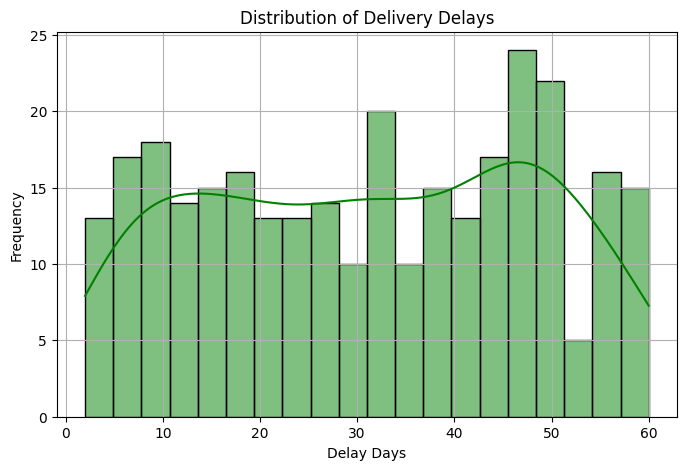

In [4]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Delay_Days'], bins=20, kde=True, color='green')
plt.title('Distribution of Delivery Delays')
plt.xlabel('Delay Days')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


C:\Users\ajayc\AppData\Local\Temp\ipykernel_13632\2422717950.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vendors.values, y=top_vendors.index, palette="viridis")


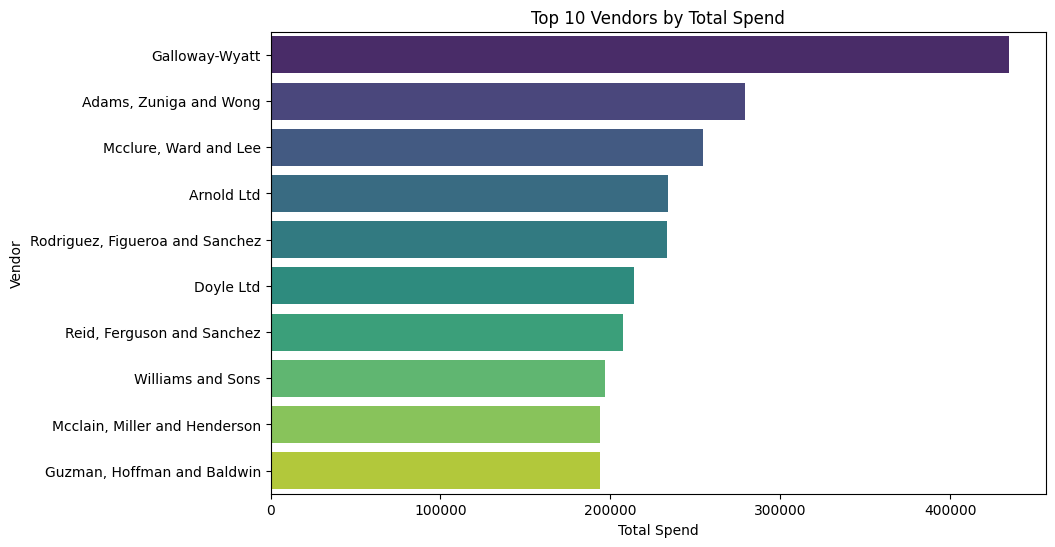

In [5]:
top_vendors = df.groupby('Vendor_Name')['Spend'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_vendors.values, y=top_vendors.index, palette="viridis")
plt.title('Top 10 Vendors by Total Spend')
plt.xlabel('Total Spend')
plt.ylabel('Vendor')
plt.show()


C:\Users\ajayc\AppData\Local\Temp\ipykernel_13632\1086194258.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_spend.values, y=country_spend.index, palette="mako")


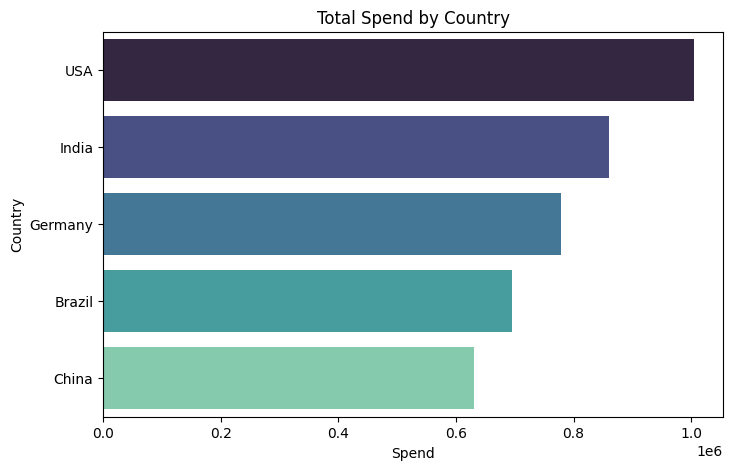

In [6]:
country_spend = df.groupby('Country')['Spend'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=country_spend.values, y=country_spend.index, palette="mako")
plt.title('Total Spend by Country')
plt.xlabel('Spend')
plt.ylabel('Country')
plt.show()


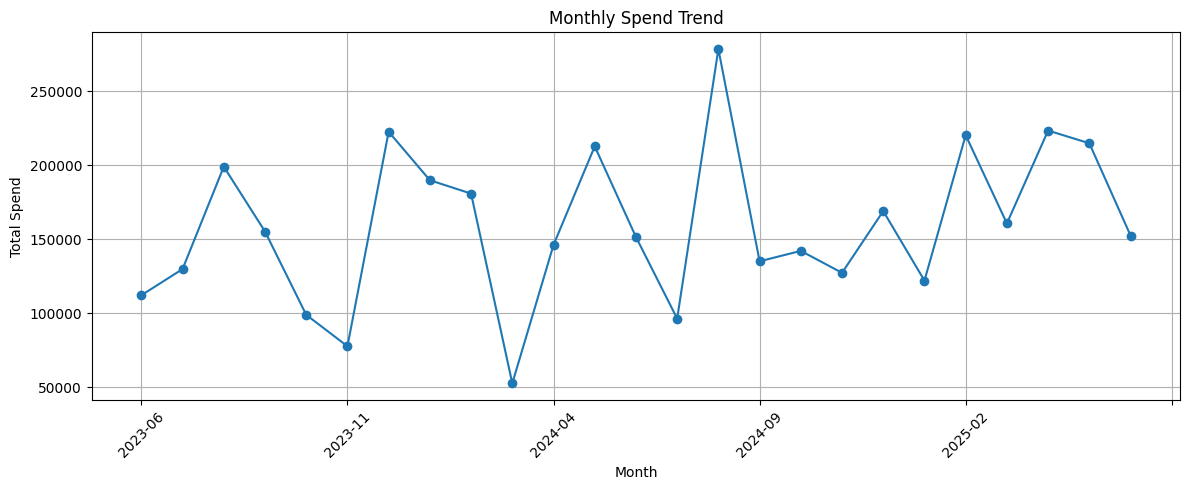

In [7]:
df['PO_Month'] = df['PO_Date'].dt.to_period('M').astype(str)

monthly_trend = df.groupby('PO_Month')['Spend'].sum()

plt.figure(figsize=(12, 5))
monthly_trend.plot(kind='line', marker='o')
plt.title('Monthly Spend Trend')
plt.xlabel('Month')
plt.ylabel('Total Spend')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\ajayc\AppData\Local\Temp\ipykernel_13632\247090458.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delayed_vendors.values, y=delayed_vendors.index, palette='Reds')


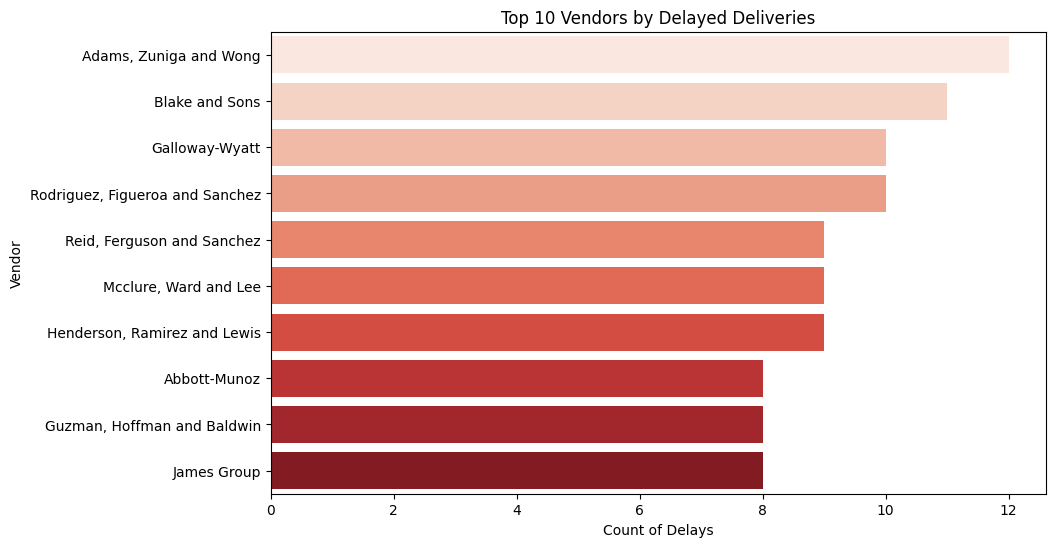

In [8]:
delayed_vendors = df[df['Delivery_Status'] == 'Delayed'].groupby('Vendor_Name')['PO_ID'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=delayed_vendors.values, y=delayed_vendors.index, palette='Reds')
plt.title('Top 10 Vendors by Delayed Deliveries')
plt.xlabel('Count of Delays')
plt.ylabel('Vendor')
plt.show()


In [9]:
summary = df.groupby('Vendor_Name').agg({
    'Spend': 'sum',
    'Delay_Days': 'mean',
    'Supplier_Rating': 'mean',
    'PO_ID': 'count'
}).rename(columns={'PO_ID': 'Total_Orders'}).sort_values(by='Spend', ascending=False)

summary.head(10)


,Spend,Delay_Days,Supplier_Rating,Total_Orders
Vendor_Name,,,,
Galloway-Wyatt,434275.70,28.434783,3.391304,23
"Adams, Zuniga and Wong",279303.71,30.909091,3.136364,22
"Mcclure, Ward and Lee",254260.57,34.600000,2.933333,15
Arnold Ltd,233792.03,30.066667,3.266667,15
"Rodriguez, Figueroa and Sanchez",233089.42,34.875000,3.250000,16
Doyle Ltd,213831.81,22.545455,2.454545,11
"Reid, Ferguson and Sanchez",207158.00,29.312500,2.812500,16
Williams and Sons,196932.39,30.866667,3.000000,15
"Mcclain, Miller and Henderson",194064.36,32.187500,3.062500,16


In [10]:
# Create a supplier-level summary
supplier_df = df.groupby('Vendor_ID').agg({
    'Spend': 'sum',
    'Delay_Days': 'mean',
    'Supplier_Rating': 'mean',
    'PO_ID': 'count',
    'Country': 'first'
}).rename(columns={'PO_ID': 'Total_Orders'}).reset_index()

# Define Risk Label
supplier_df['High_Risk'] = ((supplier_df['Supplier_Rating'] <= 2) | (supplier_df['Delay_Days'] > 30)).astype(int)

# Preview
supplier_df.head()


,Vendor_ID,Spend,Delay_Days,Supplier_Rating,Total_Orders,Country,High_Risk
0,V0001,233089.42,34.875000,3.250000,16,Germany,1
1,V0002,213831.81,22.545455,2.454545,11,USA,0
2,V0003,194064.36,32.187500,3.062500,16,USA,1
3,V0004,158582.91,31.600000,2.400000,10,India,1
4,V0005,193566.67,25.250000,2.800000,20,Brazil,0


In [11]:
# Features and target
features = ['Spend', 'Delay_Days', 'Supplier_Rating', 'Total_Orders']
target = 'High_Risk'

X = supplier_df[features]
y = supplier_df[target]


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Confusion Matrix:
 [[3 0]
 [0 1]]


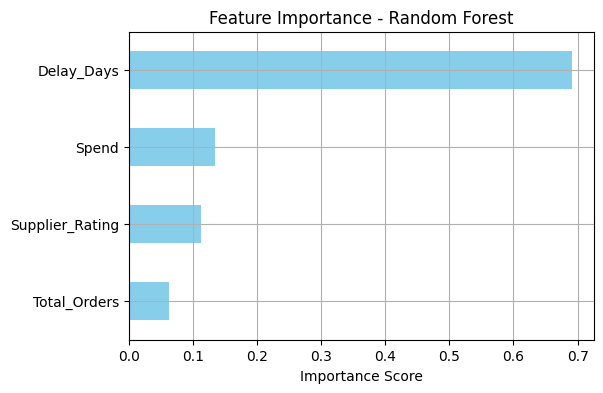

In [13]:
importances = model.feature_importances_
feat_importance = pd.Series(importances, index=features).sort_values()

plt.figure(figsize=(6,4))
feat_importance.plot(kind='barh', color='skyblue')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.grid(True)
plt.show()


In [15]:
# Save final dataset to CSV
supplier_df.to_csv('../data/supplier_risk_summary.csv', index=False)

import os
print("File exists:", os.path.exists('../data/supplier_risk_summary.csv'))


File exists: True
